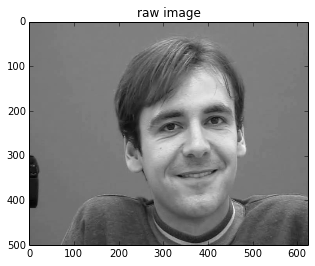

(500, 625)


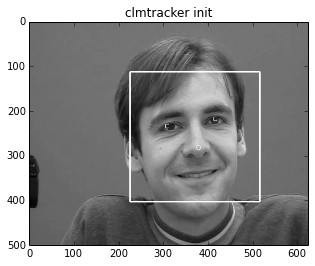

one frame of face takes 50.8549213409 ms
one frame of eyes takes 62.1030330658 ms
one frame of nose takes 47.0788478851 ms
eye detected are [[164  85  56  56]
 [ 68 100  54  54]]
nose detected are [378.40625, 282.015625]


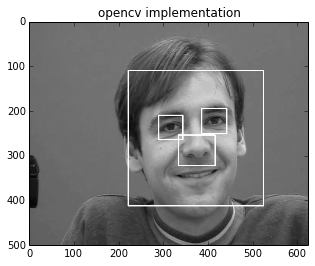

[[221 110 302 302]]


In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('../../clmtrackr/examples/media/franck_02159.jpg')
img = cv2.resize(img, (625, 500))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = np.asarray(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
plt.imshow(gray, cmap='gray')
plt.title('raw image')
plt.show()
print gray.shape

# example output
dst = gray.copy()
(x, y, w, h) = [225, 113, 290, 290]
left_eye = [308.875, 234.4375]
right_eye = [415.8125, 218.125]
nose = [378.40625, 282.015625]
cv2.rectangle(dst, (x, y), (x+w, y+h), (255),2)
cv2.circle(dst, (int(left_eye[0]), int(left_eye[1])), 5, (255))
cv2.circle(dst, (int(right_eye[0]), int(right_eye[1])), 5, (255))
cv2.circle(dst, (int(nose[0]), int(nose[1])), 5, (255))
plt.imshow(dst, cmap='gray')
plt.title('clmtracker init')
plt.show()

# use cv2 haars detector for face and mosse for eye and nose
import time
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')
nose_cascade = cv2.CascadeClassifier('haarcascade_nose2.xml')
start_time = time.time()
faces = face_cascade.detectMultiScale(gray)
print 'one frame of face takes {} ms'.format((time.time()-start_time)*1e3)
(fx, fy, fw, fh) = faces[0]
face_crop = gray[fy:fy+fh,fx:fx+fw]
start_time = time.time()
eyes = eye_cascade.detectMultiScale(face_crop)
print 'one frame of eyes takes {} ms'.format((time.time()-start_time)*1e3)
start_time = time.time()
noses = nose_cascade.detectMultiScale(face_crop, minNeighbors=6)
print 'one frame of nose takes {} ms'.format((time.time()-start_time)*1e3)
print 'eye detected are {}'.format(eyes)
print 'nose detected are {}'.format(nose)
dst2 = gray.copy()
cv2.rectangle(dst2, (fx, fy), (fx+fw, fy+fh), (255),2)
for detected in eyes:
    (x, y, w, h) = detected
    cv2.rectangle(dst2, (x+fx, y+fy), (x+fx+w, y+fy+h), (255),2)
for detected in noses:
    (x, y, w, h) = detected
    cv2.rectangle(dst2, (x+fx, y+fy), (x+fx+w, y+fy+h), (255),2)

plt.imshow(dst2, cmap='gray')
plt.title('opencv implementation')
plt.show()

print faces


In [61]:
import json
import math
from copy import deepcopy
import numpy as np
model = json.load(open('existing_models/model_pca_20_svm.json'))

def procrustes(data1, data2):
    assert len(data1) == len(data2)
    template = deepcopy(data1)
    shape = deepcopy(data2)
    templateMean = np.mean(template, axis=0)
    shapeMean = np.mean(shape, axis=0)
    translateX = templateMean[0] - shapeMean[0]
    translateY = templateMean[1] - shapeMean[1]
    template -= templateMean
    shape -= shapeMean
    scaleS = 0
    scaleT = 0
    for i in range(len(shape)):
        scaleS += (shape[i][0]*shape[i][0] + shape[i][1]*shape[i][1])
        scaleT += (template[i][0]*template[i][0] + template[i][1]*template[i][1])
    scaling = math.sqrt(scaleT/1.0/scaleS)
    shape *= scaling
    top = 0
    bottom = 0
    for i in range(len(shape)):
        top += shape[i][0]*template[i][1]-shape[i][1]*template[i][0]
        bottom += shape[i][0]*template[i][0]+shape[i][1]*template[i][1]

    rotation = math.atan(top/bottom)
    translateX += (shapeMean[0]-(scaling*math.cos(-rotation)*shapeMean[0])-(scaling*shapeMean[1]*math.sin(-rotation)));
    translateY += (shapeMean[1]+(scaling*math.sin(-rotation)*shapeMean[0])-(scaling*shapeMean[1]*math.cos(-rotation)));

    return [translateX, translateY, scaling, rotation]

procrustes_params = procrustes([left_eye, right_eye, nose], 
                               [model['hints']['leftEye'], model['hints']['rightEye'], model['hints']['nose']])
print procrustes_params



[140.47690471606342, 137.03046161488538, 3.6260876562291693, -0.1687071977286938]


In [44]:
model['hints']['leftEye']

[41.96084875111114, 34.61071899652552]

In [55]:
import scipy
import scipy.spatial
print scipy.spatial.procrustes([left_eye, right_eye, nose], 
                               [model['hints']['leftEye'], model['hints']['rightEye'], model['hints']['nose']])

(array([[-0.65384042, -0.11584334],
       [ 0.53481298, -0.29716335],
       [ 0.11902744,  0.41300669]]), array([[-0.62297262, -0.10713368],
       [ 0.53984981, -0.3288384 ],
       [ 0.08312281,  0.43597209]]), 0.0038739095071609756)


In [66]:
faces = face_cascade.detectMultiScale(gray)

In [80]:
gray=img[:,:,0]*0.3+img[:,:,1]*0.59+img[:,:,2]*0.11

In [71]:
gray.shape


(500, 625)

In [72]:
g2=np.asarray(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

In [73]:
g2.shape

(500, 625)

In [74]:
gray = np.asarray(gray)

In [81]:
gray=img[:,:,0]*0.3+img[:,:,1]*0.59+img[:,:,2]*0.11
gray=np.asarray(gray, dtype=np.uint8)


In [82]:
faces = face_cascade.detectMultiScale(gray)

In [83]:
jac

NameError: name 'jac' is not defined

In [85]:
img.shape[0]

500